In [1]:
import matplotlib.pyplot as plt

In [2]:
# reload packages
%load_ext autoreload
%autoreload 2

### Choose GPU (this may not be needed on your computer)

In [3]:
%env CUDA_DEVICE_ORDER=PCI_BUS_ID
%env CUDA_VISIBLE_DEVICES=''

env: CUDA_DEVICE_ORDER=PCI_BUS_ID
env: CUDA_VISIBLE_DEVICES=''


### load packages

In [4]:
from tfumap.umap import tfUMAP

/mnt/cube/tsainbur/Projects/github_repos/umap_tf_networks/tfumap/umap.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm
import umap
import pandas as pd

### Load dataset

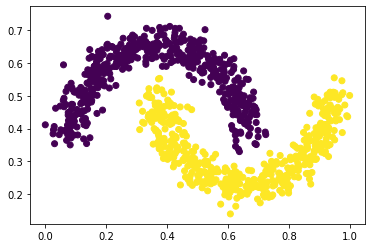

In [6]:
from sklearn.datasets import make_moons

X_train, Y_train = make_moons(1000, random_state=0, noise=0.1)

X_test, Y_test = make_moons(1000, random_state=1, noise=0.1)

X_valid, Y_valid = make_moons(1000, random_state=2, noise=0.1)

def norm(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

X_train = norm(X_train)
X_valid = norm(X_valid)
X_test = norm(X_test)
X_train_flat = X_train

X_test_flat = X_test


plt.scatter(X_test[:,0], X_test[:,1], c=Y_test)

### Create model and train

In [7]:
from ivis import Ivis
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets

In [8]:
X_scaled = MinMaxScaler().fit_transform(X_train)

In [9]:
# Set ivis parameters
model = Ivis(embedding_dims=2, k=150)

In [10]:
# Generate embeddings
embeddings =z = model.fit_transform(X_scaled)

100%|██████████| 1000/1000 [00:00<00:00, 101108.98it/s]

Building KNN index
Extracting KNN neighbours



100%|█████████▉| 997/1000 [00:00<00:00, 7580.75it/s]


Training neural network
Epoch 1/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.7732
Epoch 2/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.4814
Epoch 3/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.3492
Epoch 4/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.3542
Epoch 5/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.3413
Epoch 6/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.2871
Epoch 7/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.3016
Epoch 8/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.2870
Epoch 9/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.2731
Epoch 10/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.2591
Epoch 11/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.2426
Epoch 12/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.2400
Epoch 13/1000
8/8 [======

In [11]:
z = embeddings

### Plot model output

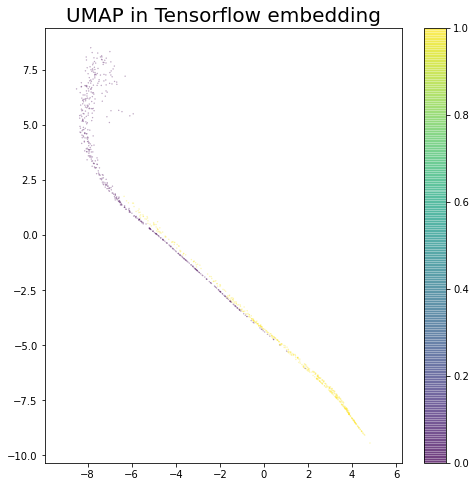

In [12]:
fig, ax = plt.subplots( figsize=(8, 8))
sc = ax.scatter(
    z[:, 0],
    z[:, 1],
    c=Y_train[:len(z)],
    cmap="viridis",
    s=0.1,
    alpha=0.5,
    rasterized=True,
)
ax.axis('equal')
ax.set_title("UMAP in Tensorflow embedding", fontsize=20)
plt.colorbar(sc, ax=ax);

### Save output

In [13]:
from tfumap.paths import ensure_dir, MODEL_DIR

In [14]:
output_dir = MODEL_DIR/'projections'/ 'moons' / 'ivis'
ensure_dir(output_dir)

In [15]:
np.save(output_dir / 'z.npy', z)